<a href="https://colab.research.google.com/github/ashmeenkhaira/DSA-in-JAVA/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
file_path = "/content/sample_data/Kaggle-Wars Train.csv"

In [3]:
data=pd.read_csv(file_path)

In [4]:
data.columns

Index(['Unnamed: 0', 'Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel',
       'DataSource', 'Class', 'Topic', 'Data_Value', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_limit_Low', 'Confidence_limit_High',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'LocationID'],
      dtype='object')

In [5]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Unnamed: 0                        0
Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    24696
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    43997
Data_Value_Footnote           43997
Confidence_limit_Low          24696
Confidence_limit_High         24696
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
StratificationCategory3           1
Stratification3                   1
LocationID                        1
dtype: int64

Percentage of Missing Data:
 Unnamed: 0                     0.000000
Year                           0.000000
LocationAbbr                   0.000000
LocationDesc 

In [6]:
# prompt: generate imputation code for missing values in given dataset

# Identify columns with missing values
cols_with_missing = missing_percentage[missing_percentage > 0].index

# Imputation methods for different data types
for col in cols_with_missing:
    if pd.api.types.is_numeric_dtype(data[col]):
        # For numerical columns, use mean imputation
        data[col].fillna(data[col].mean(), inplace=True)
    elif pd.api.types.is_categorical_dtype(data[col]):
        # For categorical columns, use mode imputation
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        # For other data types, you might need a more specific imputation strategy
        print(f"Column '{col}' has a non-numeric, non-categorical data type.")
        # Example: for object/string type, fill with the most frequent value
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True)

# Verify imputation
missing_values_after = data.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)

<ipython-input-6-91bb59d583fe>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-6-91bb59d583fe>:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[col]):
<ipython-input-6-91bb59d583fe>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Th

Column 'Data_Value_Footnote_Symbol' has a non-numeric, non-categorical data type.
Column 'Data_Value_Footnote' has a non-numeric, non-categorical data type.
Column 'StratificationCategory3' has a non-numeric, non-categorical data type.
Column 'Stratification3' has a non-numeric, non-categorical data type.

Missing Values After Imputation:
 Unnamed: 0                    0
Year                          0
LocationAbbr                  0
LocationDesc                  0
GeographicLevel               0
DataSource                    0
Class                         0
Topic                         0
Data_Value                    0
Data_Value_Unit               0
Data_Value_Type               0
Data_Value_Footnote_Symbol    0
Data_Value_Footnote           0
Confidence_limit_Low          0
Confidence_limit_High         0
StratificationCategory1       0
Stratification1               0
StratificationCategory2       0
Stratification2               0
StratificationCategory3       0
Stratification3   

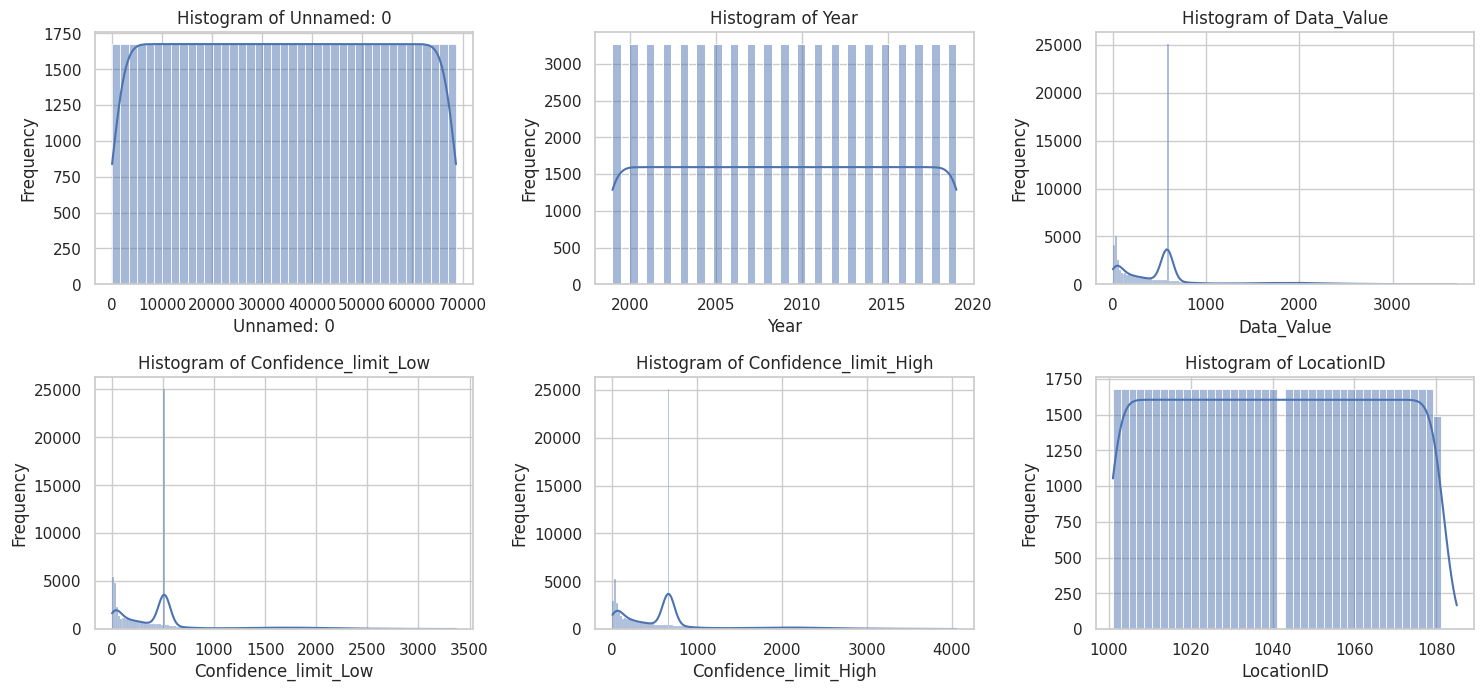

In [9]:
# prompt: generate histogram plot for data after imputation

# Plotting histograms for numerical columns after imputation
plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.histplot(data[col], kde=True)  # Use kde=True to show kernel density estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout for better spacing

plt.show()

In [12]:
for col in data.select_dtypes(include=np.number).columns:
    # Using IQR method to identify outliers and calculate bounds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# prompt: remove outliers

    # Removing outliers based on calculated bounds
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Display the updated DataFrame after outlier removal
data

,Unnamed: 0,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,...,Data_Value_Footnote,Confidence_limit_Low,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,LocationID
0,0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.000000
1,1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.000000
2,2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.000000
3,3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.000000
4,4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,1001.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,68688,2007,AL,Lee,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,1081.000000
68689,68689,2009,AL,Lee,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,1081.000000
68690,68690,2011,AL,Lee,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,1081.000000
68691,68691,2015,AL,Lee,County,NVSS,Cardiovascular Diseases,All heart disease,582.848558,"per 100,000",...,Value suppressed,513.194629,663.055906,Age group,Ages 65 years and older,Race,Hispanic,Sex,Overall,1081.000000


In [19]:
# prompt: Check the shape of the data before and after removal of outliers

# Print the shape of the data before outlier removal
print("Shape of data before outlier removal:", data.shape)

# ... (Your existing outlier removal code) ...

# Print the shape of the data after outlier removal
print("Shape of data after outlier removal:", data.shape)

Shape of data before outlier removal: (60606, 19)
Shape of data after outlier removal: (60606, 19)


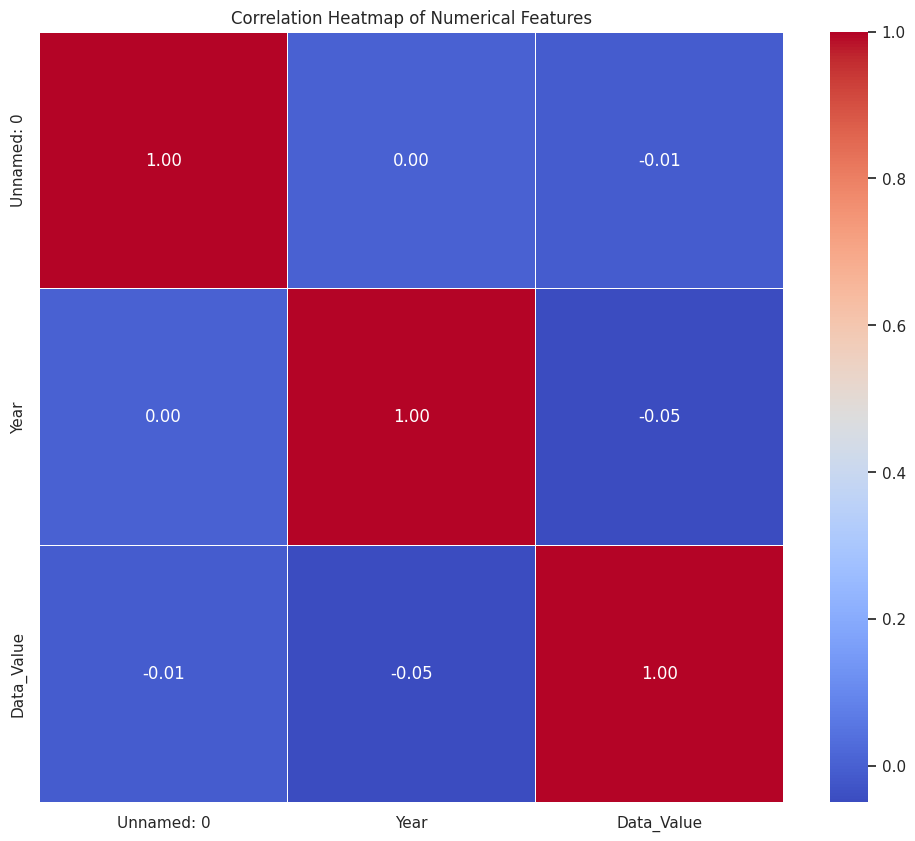

In [47]:
# prompt: generate heat map for this data


# Assuming 'data' DataFrame is already created and processed as in your provided code

# Select numerical columns for the heatmap
numerical_cols = data.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [21]:
# prompt: drop the one columns from  high correlativity columns pairs

# Identify highly correlated features
threshold = 0.9  # Adjust as needed
highly_correlated_pairs = []
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((numerical_cols[i], numerical_cols[j]))

# Drop one column from each highly correlated pair
columns_to_drop = []
for pair in highly_correlated_pairs:
    col1, col2 = pair
    # Choose the column to drop based on a criteria (e.g., lower correlation with the target variable)
    # Here, we simply drop the second column in the pair
    columns_to_drop.append(col2)

# Remove duplicate column names before dropping
columns_to_drop = list(set(columns_to_drop))

# Drop the selected columns
data = data.drop(columns=columns_to_drop)

# Display updated DataFrame and correlation matrix
print("Shape after dropping highly correlated features:", data.shape)

Shape after dropping highly correlated features: (60606, 19)


In [22]:
data.columns

Index(['Unnamed: 0', 'Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel',
       'DataSource', 'Class', 'Topic', 'Data_Value', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3'],
      dtype='object')

In [23]:
# prompt: Unique value count for categorical data

# Assuming 'data' DataFrame is already created and processed as in your provided code

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Iterate through categorical columns and print unique value counts
for col in categorical_cols:
    print(f"Unique values and counts for column '{col}':")
    print(data[col].value_counts())
    print("-" * 30)

Unique values and counts for column 'LocationAbbr':
LocationAbbr
AL    60606
Name: count, dtype: int64
------------------------------
Unique values and counts for column 'LocationDesc':
LocationDesc
Cherokee      1522
Fayette       1519
Lamar         1516
Greene        1516
Blount        1513
Lauderdale    1512
Bibb          1511
Cleburne      1509
Jackson       1506
DeKalb        1506
Geneva        1506
Cullman       1502
Houston       1499
Jefferson     1498
Franklin      1497
Chambers      1488
Baldwin       1484
Henry         1472
Covington     1472
Autauga       1471
Butler        1470
Elmore        1470
Barbour       1470
Hale          1469
Conecuh       1468
Crenshaw      1467
Coosa         1467
Clarke        1467
Clay          1466
Dale          1464
Colbert       1464
Dallas        1461
Choctaw       1461
Coffee        1460
Bullock       1460
Etowah        1459
Chilton       1458
Lawrence      1457
Escambia      1450
Calhoun       1439
Lee           1338
Lowndes          2
Nam

In [24]:
# prompt: create dummy variables

# Create dummy variables for categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the updated DataFrame with dummy variables
print(data.head())

   Unnamed: 0  Year  Data_Value  LocationDesc_Baldwin  LocationDesc_Barbour  \
0           0  1999  582.848558                 False                 False   
1           1  2013  582.848558                 False                 False   
2           2  2014  582.848558                 False                 False   
3           3  2005  582.848558                 False                 False   
4           4  2012  582.848558                 False                 False   

   LocationDesc_Bibb  LocationDesc_Blount  LocationDesc_Bullock  \
0              False                False                 False   
1              False                False                 False   
2              False                False                 False   
3              False                False                 False   
4              False                False                 False   

   LocationDesc_Butler  LocationDesc_Calhoun  ...  Topic_Heart failure  \
0                False                 False  ..

In [26]:
data.columns


Index(['Unnamed: 0', 'Year', 'Data_Value', 'LocationDesc_Baldwin',
       'LocationDesc_Barbour', 'LocationDesc_Bibb', 'LocationDesc_Blount',
       'LocationDesc_Bullock', 'LocationDesc_Butler', 'LocationDesc_Calhoun',
       'LocationDesc_Chambers', 'LocationDesc_Cherokee',
       'LocationDesc_Chilton', 'LocationDesc_Choctaw', 'LocationDesc_Clarke',
       'LocationDesc_Clay', 'LocationDesc_Cleburne', 'LocationDesc_Coffee',
       'LocationDesc_Colbert', 'LocationDesc_Conecuh', 'LocationDesc_Coosa',
       'LocationDesc_Covington', 'LocationDesc_Crenshaw',
       'LocationDesc_Cullman', 'LocationDesc_Dale', 'LocationDesc_Dallas',
       'LocationDesc_DeKalb', 'LocationDesc_Elmore', 'LocationDesc_Escambia',
       'LocationDesc_Etowah', 'LocationDesc_Fayette', 'LocationDesc_Franklin',
       'LocationDesc_Geneva', 'LocationDesc_Greene', 'LocationDesc_Hale',
       'LocationDesc_Henry', 'LocationDesc_Houston', 'LocationDesc_Jackson',
       'LocationDesc_Jefferson', 'LocationDesc_Lama

In [27]:
# prompt: 'Unnamed: 0', 'Year', 'Data_Value', 'LocationDesc_Baldwin',
#        'LocationDesc_Barbour', 'LocationDesc_Bibb', 'LocationDesc_Blount',
#        'LocationDesc_Bullock', 'LocationDesc_Butler', 'LocationDesc_Calhoun',
#        'LocationDesc_Chambers', 'LocationDesc_Cherokee',
#        'LocationDesc_Chilton', 'LocationDesc_Choctaw', 'LocationDesc_Clarke',
#        'LocationDesc_Clay', 'LocationDesc_Cleburne', 'LocationDesc_Coffee',
#        'LocationDesc_Colbert', 'LocationDesc_Conecuh', 'LocationDesc_Coosa',
#        'LocationDesc_Covington', 'LocationDesc_Crenshaw',
#        'LocationDesc_Cullman', 'LocationDesc_Dale', 'LocationDesc_Dallas',
#        'LocationDesc_DeKalb', 'LocationDesc_Elmore', 'LocationDesc_Escambia',
#        'LocationDesc_Etowah', 'LocationDesc_Fayette', 'LocationDesc_Franklin',
#        'LocationDesc_Geneva', 'LocationDesc_Greene', 'LocationDesc_Hale',
#        'LocationDesc_Henry', 'LocationDesc_Houston', 'LocationDesc_Jackson',
#        'LocationDesc_Jefferson', 'LocationDesc_Lamar',
#        'LocationDesc_Lauderdale', 'LocationDesc_Lawrence', 'LocationDesc_Lee',
#        'LocationDesc_Lowndes', 'Topic_All stroke',
#        'Topic_Cardiovascular disease (CVD)',
#        'Topic_Coronary heart disease (CHD)', 'Topic_Heart failure',
#        'Stratification1_Ages 65 years and older',
#        'Stratification2_Asian/Pacific Islander',
#        'Stratification2_Black (Non-Hispanic)', 'Stratification2_Hi',
#        'Stratification2_Hispanic', 'Stratification2_Overall',
#        'Stratification2_White', 'Stratification3_Overall',
#        'Stratification3_Women'] Define your features (independent variables) and target (dependent variable)

# Define features (X) and target (y)
# Target variable (dependent variable)
target_variable = 'Data_Value'

# Features (independent variables) -  exclude the target variable and 'Unnamed: 0'
features = [col for col in data.columns if col not in ['Data_Value', 'Unnamed: 0']]

X = data[features]
y = data[target_variable]

print("Features (X):", X.columns.tolist())
print("\nTarget Variable (y):", target_variable)

Features (X): ['Year', 'LocationDesc_Baldwin', 'LocationDesc_Barbour', 'LocationDesc_Bibb', 'LocationDesc_Blount', 'LocationDesc_Bullock', 'LocationDesc_Butler', 'LocationDesc_Calhoun', 'LocationDesc_Chambers', 'LocationDesc_Cherokee', 'LocationDesc_Chilton', 'LocationDesc_Choctaw', 'LocationDesc_Clarke', 'LocationDesc_Clay', 'LocationDesc_Cleburne', 'LocationDesc_Coffee', 'LocationDesc_Colbert', 'LocationDesc_Conecuh', 'LocationDesc_Coosa', 'LocationDesc_Covington', 'LocationDesc_Crenshaw', 'LocationDesc_Cullman', 'LocationDesc_Dale', 'LocationDesc_Dallas', 'LocationDesc_DeKalb', 'LocationDesc_Elmore', 'LocationDesc_Escambia', 'LocationDesc_Etowah', 'LocationDesc_Fayette', 'LocationDesc_Franklin', 'LocationDesc_Geneva', 'LocationDesc_Greene', 'LocationDesc_Hale', 'LocationDesc_Henry', 'LocationDesc_Houston', 'LocationDesc_Jackson', 'LocationDesc_Jefferson', 'LocationDesc_Lamar', 'LocationDesc_Lauderdale', 'LocationDesc_Lawrence', 'LocationDesc_Lee', 'LocationDesc_Lowndes', 'Topic_All 

In [28]:
 file_path2 = "/content/sample_data/Kaggle-Wars Test.csv"

In [29]:
# prompt: use OLS model and train it accordingly using file_path2 test data and train data



# Load the training data (assuming 'data' DataFrame is already created and processed)
# ... (Your existing code for data loading and preprocessing) ...


# Load the test data
test_data = pd.read_csv(file_path2)

# Preprocess the test data (apply the same preprocessing steps as the training data)
# ... (Your existing code for data imputation, outlier removal, feature engineering) ...
# Handle Missing Values (if any in the test data)
missing_values_test = test_data.isnull().sum()
print("Missing Values in Test Data:\n", missing_values_test)

for col in test_data.columns:
    if pd.api.types.is_numeric_dtype(test_data[col]):
        test_data[col].fillna(test_data[col].mean(), inplace=True)
    elif pd.api.types.is_categorical_dtype(test_data[col]):
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Remove outliers using IQR (if any in the test data)
for col in test_data.select_dtypes(include=np.number).columns:
    Q1 = test_data[col].quantile(0.25)
    Q3 = test_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    test_data = test_data[(test_data[col] >= lower_bound) & (test_data[col] <= upper_bound)]

# Identify highly correlated columns in test data
numerical_cols_test = test_data.select_dtypes(include=np.number).columns
correlation_matrix_test = test_data[numerical_cols_test].corr()
threshold = 0.9

# Create dummy variables for the test data
categorical_cols_test = test_data.select_dtypes(include=['object', 'category']).columns
test_data = pd.get_dummies(test_data, columns=categorical_cols_test, drop_first=True)

# Align columns between train and test data
X_train, X_test = X, test_data
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Initialize and train the OLS model
model = sm.OLS(y, X_train).fit()

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(model.summary())

Missing Values in Test Data:
 Unnamed: 0                         0
Index                              0
Year                               0
LocationAbbr                       0
LocationDesc                       0
GeographicLevel                    0
DataSource                         0
Class                              0
Topic                              0
Data_Value_Unit                    0
Data_Value_Type                    0
Data_Value_Footnote_Symbol    107679
Data_Value_Footnote           107679
Confidence_limit_Low               0
Confidence_limit_High              0
StratificationCategory1            0
Stratification1                    0
StratificationCategory2            0
Stratification2                    0
StratificationCategory3            0
Stratification3                    0
LocationID                         1
dtype: int64


<ipython-input-29-a5ca6bed8f64>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(test_data[col].mean(), inplace=True)
<ipython-input-29-a5ca6bed8f64>:21: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(test_data[col]):


                                 OLS Regression Results                                
Dep. Variable:             Data_Value   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                          1.394e+05
Date:                Tue, 24 Dec 2024   Prob (F-statistic):                        0.00
Time:                        06:19:02   Log-Likelihood:                     -4.2349e+05
No. Observations:               60606   AIC:                                  8.470e+05
Df Residuals:                   60605   BIC:                                  8.470e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
# prompt: Adding a constant to the test predictors

# Add a constant to the test predictors
X_test = sm.add_constant(X_test)

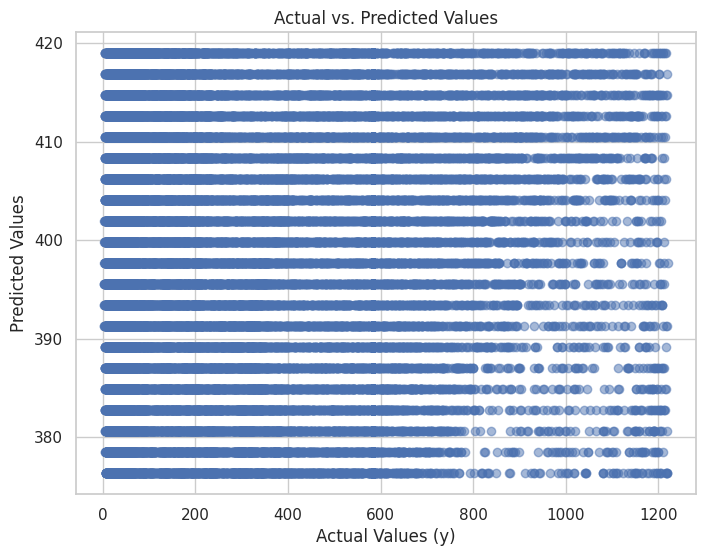

In [38]:
# prompt: plot scatter plot

# Assuming X and y are defined as in your previous code
# ... (Your existing code for loading, preprocessing, and model fitting) ...



# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y, model.predict(X_train), alpha=0.5)  # Use model predictions on training data
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

In [39]:
# prompt: # Initialize the StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming 'X' is your feature matrix (independent variables)
# Fit the scaler on the training data and transform it
X_scaled = scaler.fit_transform(X)

# For the test data, you only need to transform it using the same scaler fitted on the training data
# X_test_scaled = scaler.transform(X_test)

In [40]:
# prompt: # Create and fit the model

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: R-squared)
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

R-squared: 0.5740694867543856


In [41]:
# prompt: # Make predictions on the  test data

# Assuming X_test and model are already defined as in your previous code

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print or save the predictions
y_pred
# You can save y_pred to a CSV file if needed:
# pd.DataFrame({'Predicted_Value': y_pred}).to_csv('predictions.csv', index=False)

array([756.72330795, 193.26286878, 543.08720565, ..., 661.92481054,
       637.36021728, 504.93567342])

In [42]:
# prompt: # Calculate MSE and RMSE

from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 29485.13627243583
Root Mean Squared Error (RMSE): 171.71236493751937


In [44]:
print(y_pred)
y_test

[756.72330795 193.26286878 543.08720565 ... 661.92481054 637.36021728
 504.93567342]


,Data_Value
56285,582.848558
66337,215.400000
54756,491.100000
60477,877.200000
32755,22.800000
...,...
61630,373.100000
11903,25.400000
18157,582.848558
17688,582.848558


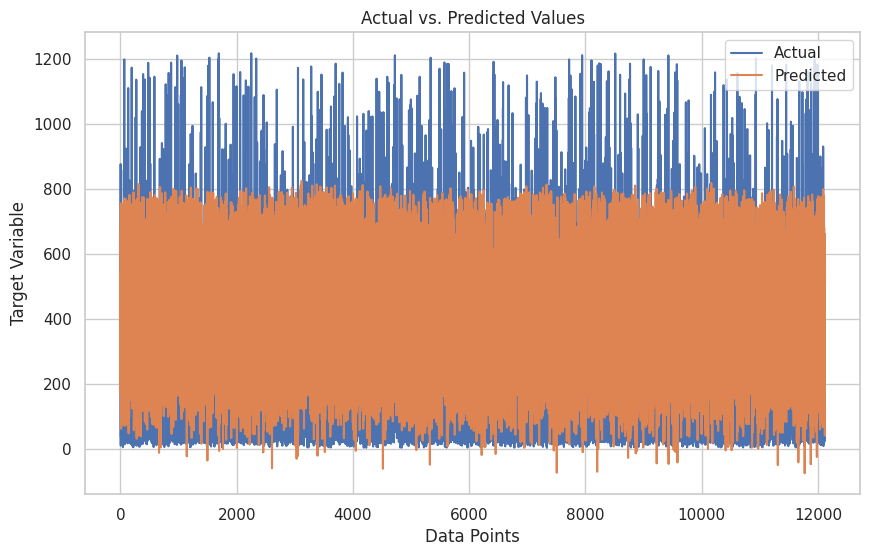

In [45]:
# prompt: plot the prediction graph for the different columns

import matplotlib.pyplot as plt

# Assuming y_pred and y_test are already defined from your previous code
# ... (Your existing code) ...

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')  # Use .values to get a NumPy array
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

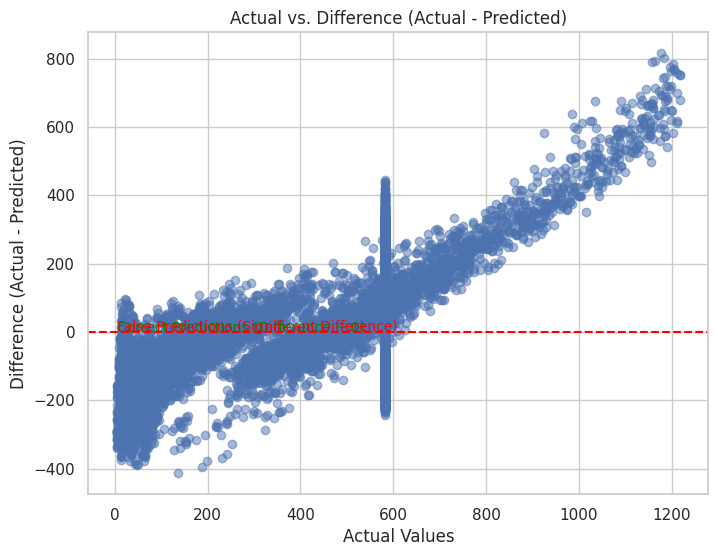

In [46]:
# prompt: plot the graph which shows correctly predicted and false predicted

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code
# ... (Your existing code) ...

# Calculate the difference between actual and predicted values
differences = y_test - y_pred

# Create a scatter plot to visualize correctly and falsely predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, differences, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0

plt.xlabel("Actual Values")
plt.ylabel("Difference (Actual - Predicted)")
plt.title("Actual vs. Difference (Actual - Predicted)")
plt.grid(True)

# Add labels for correct and false predictions
plt.text(y_test.min(), 0.5, "Correct Predictions (Difference ~ 0)", color='green', fontsize=10)
plt.text(y_test.min(), 2, "False Predictions (Significant Difference)", color='red', fontsize=10)

plt.show()